## Getting the Data ready

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting data to be used with machine learning

Three main things we have to do:
    1. Split the data inot features and lebels (usually x & y)
    2. Filling (also called imputing) or disregarding missing values.
    3. Converting non-numerical values to numerical values (also called feature encoding)


In [2]:
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

In [4]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)

In [5]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure its all numerical

In [6]:
car_sales=pd.read_csv("Data/car-sales-extended.csv")
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,BMW,White,130538,4,9374
8,Honda,Blue,51029,4,26683
9,Nissan,White,167421,4,16259


In [7]:
# split into X & Y
X=car_sales.drop("Price", axis=1)
Y=car_sales["Price"]
X_test, X_train, Y_test, Y_train = train_test_split(X,Y,test_size=(0.2))

In [8]:
# # build ML model
# from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(X_train, Y_train)
# model.score(X_test, Y_test)

In [9]:
# turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features)], remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [10]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
852,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
853,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
854,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [11]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
851,4,0,0,0,1,1,0,0,0,0
852,3,0,1,0,0,0,0,0,0,1
853,4,0,0,1,0,0,1,0,0,0
854,4,0,1,0,0,0,0,0,0,1


In [12]:
# refill the model
np.random.seed(42)
X_train, X_test, Y_train, Y_test=train_test_split(transformed_X, Y, test_size=0.2)
model.fit(X_train,Y_train)

NameError: name 'model' is not defined

In [13]:
model.score(X_test, Y_test)

NameError: name 'model' is not defined

### 1.2 What if we have missing values?

1. Fill them with some value (known as imputation).
2. Remove the sample with missing data.

In [14]:
car_sales_missing=pd.read_csv("Data\car-sales-extended-missing-data.csv")
car_sales_missing.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [15]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [16]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [17]:
# create x & y
X= car_sales_missing.drop("Price", axis=1)
Y= car_sales_missing["Price"]

#### Option1: fill missing data with pandas

In [18]:
# fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# fill the "Colour"column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# fill "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

# fill "Doors" column
car_sales_missing["Doors"].fillna(4 ,inplace= True)

In [19]:
# check data frame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [20]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum(), len(car_sales_missing)

(Make             0
 Colour           0
 Odometer (KM)    0
 Doors            0
 Price            0
 dtype: int64, 950)

In [21]:
X= car_sales_missing.drop("Price", axis=1)
Y= car_sales_missing["Price"]

In [22]:
# convert data to numbers
# turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features)], remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [23]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
946,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
947,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


#### Option2: use sci-kit learn to fill in the missing data

In [24]:
car_sales_missing2=pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing2.head(20), car_sales_missing2.isna().sum()

(      Make Colour  Odometer (KM)  Doors    Price
 0    Honda  White        35431.0    4.0  15323.0
 1      BMW   Blue       192714.0    5.0  19943.0
 2    Honda  White        84714.0    4.0  28343.0
 3   Toyota  White       154365.0    4.0  13434.0
 4   Nissan   Blue       181577.0    3.0  14043.0
 5    Honda    Red        42652.0    4.0  23883.0
 6   Toyota   Blue       163453.0    4.0   8473.0
 7    Honda  White            NaN    4.0  20306.0
 8      NaN  White       130538.0    4.0   9374.0
 9    Honda   Blue        51029.0    4.0  26683.0
 10  Nissan  White       167421.0    4.0  16259.0
 11  Nissan  Green        17119.0    4.0   6160.0
 12  Nissan  White       102303.0    4.0  16909.0
 13     NaN  White       134181.0    4.0  11121.0
 14   Honda   Blue       199833.0    4.0  18946.0
 15  Toyota   Blue       205592.0    4.0  16290.0
 16  Toyota    Red        96742.0    4.0  34465.0
 17     BMW  White       194189.0    5.0  17177.0
 18  Nissan  White        67991.0    3.0   9109.0


In [25]:
# drop the missing "Price" data
car_sales_missing2.dropna(subset=["Price"], inplace=True)
car_sales_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [26]:
# split into x & y
X=car_sales_missing2.drop("Price", axis=1)
Y=car_sales_missing2["Price"]

In [27]:
# fill missing data woth scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with "missing" & numerical values with "mean"
cat_imputer=SimpleImputer(strategy="constant", fill_value="missing")
door_imputer=SimpleImputer(strategy="constant", fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# define columns
cat_features=["Make", "Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# create an imputer (something that fills in missing data)
imputer=ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                           ("door_imputer", door_imputer, door_features),
                           ("num_imputer", num_imputer, num_features)
                           ])

# transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [28]:
car_sales_filled=pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [29]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [30]:
# convert data to numbers
# turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features)], remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [31]:
# now we have our data as numbers and filled (no missing values)
# lets fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                   Y,
                                                   test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test, Y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problem

    *Classification - Prediciting whether a sample is one thing or another.
    *Regression - Predicting a number.

### 2.1 Picking a ML model for a regression problem

In [32]:
# import Boston Housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston;

In [33]:
boston_df=pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["Target"]=pd.Series(boston["target"])
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [34]:
# how many samples?
len(boston_df)

506

In [35]:
# try the ridge regression model
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
X= boston_df.drop("Target", axis=1)
Y= boston_df["Target"]

# split data into train and test sets
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

# instantiate ridge model
model = Ridge()
model.fit(X_train, Y_train)

# check the score of ridge model
model.score(X_test, Y_test)

0.6662221670168519

In [36]:
# try the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X= boston_df.drop("Target", axis=1)
Y= boston_df["Target"]

# split data into train and test sets
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

# instantiate random forest regressor model
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

# check the score of ridge model
rf.score(X_test, Y_test)


0.873969014117403

### 2.2 Picking a ML model for a classification problem

In [37]:
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
# consulted the map and it says to try LinearSVC

# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate LinearSVC
clf=LinearSVC()

# fit the model to the data (training and ML model)
clf.fit(x_train,y_train)

# evaluate the LinearSVC (use the patterns the model has learned)
clf.score(x_test,y_test)

C:\Users\Acer\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [39]:
# output less tha 50%, consulted the map again and it says to try RandomForestClassifier

# import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate RandomForestClassifier
clf2=RandomForestClassifier()

# fit the model to the data (training and ML model)
clf2.fit(x_train,y_train)

# evaluate the RandomForestClassifier(use the patterns the model has learned)
clf2.score(x_test,y_test)

0.8524590163934426

Tips:
    1. If you have structured data, use ensemble methods.
    2. If you have unstructured data, use deep learning or transfer learning.

## 3. Fit the model/algorithm and use it make predictions on our data.

### 3.1 Fitting the model to the data

Different names for:
* X = features, features variables, data
* Y = labels, targets, target variables

In [40]:
# import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate RandomForestClassifier
clf2=RandomForestClassifier()

# fit the model to the data (training and ML model)
clf2.fit(x_train,y_train)

# evaluate the RandomForestClassifier(use the patterns the model has learned)
clf2.score(x_test,y_test)

0.8524590163934426

### 3.2 Make predictions using machine learning models

2 ways to make predictions:
1. predict()
2. predict_proba()

#### Option1: make predictions using predict()

In [41]:
# use a trained model to make prediction
y_preds=clf2.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
# compare predictions to truth labels to evaluate the model
np.mean(y_preds==y_test)

0.8524590163934426

#### Option2: make predictions using predict_proba()

In [44]:
# predict_probs() returns probabilities of a classification label
clf2.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [45]:
clf2.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [46]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
x=boston_df.drop("Target", axis=1)
y=boston_df["Target"]

# split the data
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)

# instantiate and fir the model
model=RandomForestRegressor().fit(x_train,y_train)

# make predictions
y_preds=model.predict(x_test)

In [47]:
y_preds[:10]

array([10.602, 21.753, 24.429, 14.095, 20.358, 25.265, 23.793, 25.109,
       10.952, 15.502])

In [48]:
np.array(y_test[:10])

array([12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,  8.7, 27.5])

In [49]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.8664950495049513

## 4. Evaluating ML model.

Three ways to evaluate scikit-learn model/estimator:
1. Estimator 'score' method.
2. The 'scoring' parameter.
3. Problem-specific metric functions.

### 4.1 Evaluating a model with 'score' method




In [50]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier().fit(x_train, y_train)

In [51]:
clf.score(x_train,y_train)

1.0

In [52]:
clf.score(x_test,y_test)

0.7892561983471075

In [53]:
# same for regression
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
x=boston_df.drop("Target", axis=1)
y=boston_df["Target"]

# split the data
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)

# instantiate and fir the model
model=RandomForestRegressor().fit(x_train,y_train)

In [54]:
model.score(x_test,y_test)

0.8238769438502933

### 4.2 Evaluating a model with 'scoring' method

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier().fit(x_train, y_train)

In [56]:
clf.score(x_test,y_test)

0.7892561983471075

In [57]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [58]:
np.random.seed(42)

# single training and test split score
clf_single_score=clf.score(x_test,y_test)

# take the mean of 5-fold cross-validation score
clf_score_val_score=np.mean(cross_val_score(clf,x,y))
                            
# compare the two
clf_single_score , clf_score_val_score

(0.7892561983471075, 0.8248087431693989)

#### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

##### 1. Accuracy

In [59]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf=RandomForestClassifier().fit(x_train, y_train)
cross_val_score=cross_val_score(clf,x,y)

In [61]:
np.mean(cross_val_score)

0.8214754098360656

In [62]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


#####  2. Area under the receiver operating characteristic curve (AUV/ROC)

ROC curves are a comparison of a model's true positive rate (TPR) VS. a models false positive rate (FPR)
* True Positive: model predicts 1 when truth is 1
* False Positive: model predicts 1 when truth is 0
* True Negative: model predicts 0 when truth is 0
* False Negative: model predicts 0 when truth is 1

In [63]:
from sklearn.metrics import roc_curve

# split the data
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)

# fit the classifier
clf.fit(x_train,y_train)

# make predictions with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10]

array([[0.99, 0.01],
       [0.16, 0.84],
       [0.64, 0.36],
       [0.29, 0.71],
       [0.07, 0.93],
       [0.56, 0.44],
       [0.8 , 0.2 ],
       [0.99, 0.01],
       [0.08, 0.92],
       [0.11, 0.89]])

In [64]:
# select either 0 or 1 to test the predicition
y_probs_positive=y_probs[:, 1] # we select 1
y_probs_positive[:10]

array([0.01, 0.84, 0.36, 0.71, 0.93, 0.44, 0.2 , 0.01, 0.92, 0.89])

In [65]:
# calculate fpr,tpr and thresholds
fpr, tpr, thresholds=roc_curve(y_test, y_probs_positive) # Actual (y_test) VS. Predicted (y_probs_positive)

# check false positive rates
fpr

array([0.        , 0.        , 0.00917431, 0.00917431, 0.00917431,
       0.00917431, 0.00917431, 0.00917431, 0.01834862, 0.01834862,
       0.01834862, 0.02752294, 0.02752294, 0.03669725, 0.03669725,
       0.03669725, 0.03669725, 0.03669725, 0.03669725, 0.03669725,
       0.03669725, 0.04587156, 0.06422018, 0.06422018, 0.06422018,
       0.0733945 , 0.08256881, 0.08256881, 0.08256881, 0.08256881,
       0.08256881, 0.09174312, 0.09174312, 0.09174312, 0.10091743,
       0.10091743, 0.10091743, 0.10091743, 0.10091743, 0.11009174,
       0.12844037, 0.14678899, 0.14678899, 0.1559633 , 0.17431193,
       0.20183486, 0.22018349, 0.24770642, 0.25688073, 0.26605505,
       0.26605505, 0.29357798, 0.31192661, 0.31192661, 0.31192661,
       0.32110092, 0.33027523, 0.33027523, 0.33944954, 0.33944954,
       0.37614679, 0.3853211 , 0.41284404, 0.42201835, 0.44036697,
       0.44954128, 0.4587156 , 0.46788991, 0.48623853, 0.49541284,
       0.56880734, 0.57798165, 0.6146789 , 0.65137615, 0.68807

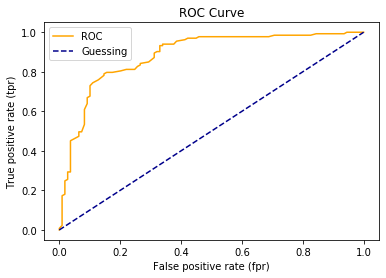

In [66]:
# create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the flase positive rate (fpr) and 
    true positive rate (tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr,tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--",label="Guessing")
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

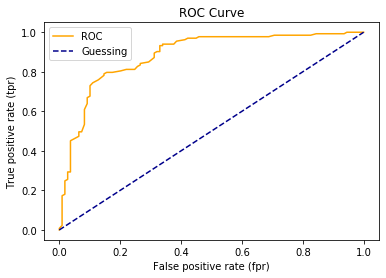

In [67]:
def plot_timepass(fpr,tpr):
    fig,ax=plt.subplots()
    ax.plot(fpr,tpr, color="orange", label="ROC")
    ax.plot([0,1],[0,1], color="darkblue", linestyle="--",label="Guessing")
    ax.legend()
    ax.set(title="ROC Curve",
           xlabel="False positive rate (fpr)",
           ylabel="True positive rate (tpr)"
           )
  
    
plot_timepass(fpr,tpr)

#####  3. Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.


In [68]:
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate the classifier
clf=RandomForestClassifier().fit(x_train, y_train)

# make a prediction
y_preds=clf.predict(x_test)

# test the predicition using confusion matrix
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [69]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_preds, y_test, rownames=["Predicted Labels"], colnames=["Actual Labels"])

Actual Labels,0,1
Predicted Labels,,
0,24,4
1,5,28


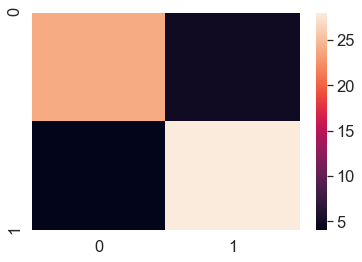

In [70]:
# make our confusion matrix more visual with 'seaborn heatmap'
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat=confusion_matrix(y_test, y_preds)

# plot using seaborn
sns.heatmap(conf_mat);

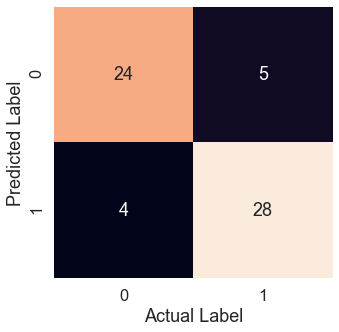

In [71]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig,ax=plt.subplots(figsize=(5,5))
    ax=sns.heatmap(conf_mat,
                  annot=True, # annotate the boxes with conf_mat info
                  cbar=False)
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted Label")
    
    # fix the broken annotations
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom+0.5, top-0.5)
 
plot_conf_mat(conf_mat)

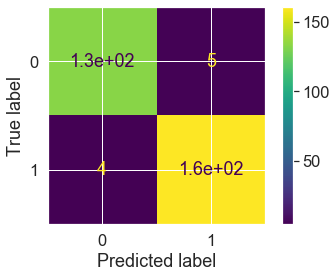

In [72]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y)

#####  4. Classification Report

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#### 4.2.2 Regression model evaluation metrics

1. R^2 or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [74]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop("Target", axis=1)
y=boston_df["Target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train, y_train);

In [76]:
model.score(x_test,y_test)

0.873969014117403

#####  1. R^2

What R^2 does is it compares your models predictions to the mean of the targets. Values can range from -infinity(a very poor model) to 1. For ex, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfecly predicts a range of numbers its R^2 would be 1.

In [77]:
from sklearn.metrics import r2_score

# fill an array with y_test mean()

y_test_mean=np.full(len(y_test), y_test.mean())

In [78]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [79]:
r2_score(y_test, y_test_mean)

0.0

In [80]:
r2_score(y_test, y_test)

1.0

#####  2. Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model's predictions are.

In [81]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae= mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [82]:
df = pd.DataFrame(data={
    "Actual Values": y_test,
    "Predicted Values": y_preds
})
df["Differences"]=df["Predicted Values"]-df["Actual Values"]
df

,Actual Values,Predicted Values,Differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [83]:
df["Abs Differences"]=abs(df["Differences"])
df

,Actual Values,Predicted Values,Differences,Abs Differences
173,23.6,23.002,-0.598,0.598
274,32.4,30.826,-1.574,1.574
491,13.6,16.734,3.134,3.134
72,22.8,23.467,0.667,0.667
452,16.1,16.853,0.753,0.753
...,...,...,...,...
412,17.9,13.030,-4.870,4.870
436,9.6,12.490,2.890,2.890
411,17.2,13.406,-3.794,3.794
86,22.5,20.219,-2.281,2.281


In [84]:
df["Abs Differences"].mean()

2.1226372549019623

#####  3. Mean Squared Error (MSE)


In [85]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(x_test)
mse=mean_squared_error(y_test, y_preds)
mse

9.242328990196082

#### 4.2.3 Using the 'scoring' parameter


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf= RandomForestClassifier()

In [87]:
np.random.seed(42)

cv_acc=cross_val_score(clf, x, y, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [88]:
# Accuracy
cv_acc=cross_val_score(clf,x,y,scoring="accuracy")
print(f"{np.mean(cv_acc)*100 :.2f}%")

80.18%


In [89]:
# Precision
cv_precision=cross_val_score(clf,x,y,scoring="precision")
print(f"{np.mean(cv_precision)*100 :.2f}%")

82.09%


In [90]:
# Recall
cv_recall=cross_val_score(clf,x,y, scoring="recall")
print(f"{np.mean(cv_recall)*100 :.2f}%")

84.85%


In [91]:
# F1
cv_f1=cross_val_score(clf,x,y, scoring="f1")
print(f"{np.mean(cv_f1)*100 :.2f}%")

84.55%


In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop("Target", axis=1)
y=boston_df["Target"]

model=RandomForestRegressor()


In [93]:
# R^2
cv_r2=cross_val_score(model, x,y, scoring="r2")
print(f"{np.mean(cv_r2)*100 :.2f}%")

62.24%


In [94]:
# Mean Absolute Error
cv_mae=cross_val_score(model, x,y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [95]:
# Mean Squared Error
cv_mse=cross_val_score(model, x,y, scoring="neg_mean_squared_error")
cv_mse

array([ -7.77433365, -12.76515461, -19.26965413, -46.20221782,
       -19.10133112])

### 4.3 Using different evaluation metrics as Scikit-Learn functions

Classification evaluation functions

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [97]:
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier().fit(x_train,y_train)

# make predictions
y_preds=clf.predict(x_test)

# evalate the classifier
print(f" Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f" Precision: {precision_score(y_test,y_preds)*100:.2f}%")
print(f" Recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f" F1: {f1_score(y_test,y_preds)*100:.2f}%")

 Accuracy: 78.93%
 Precision: 74.70%
 Recall: 93.23%
 F1: 82.94%


**Regression Evaluation Functions**

In [98]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [99]:
np.random.seed(42)

x=boston_df.drop("Target", axis=1)
y=boston_df["Target"]

x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train, y_train)

# make predictions
y_preds=clf.predict(x_test)

# evalate the classifier
print(f" R^2: {r2_score(y_test,y_preds)}")
print(f" MAE: {mean_absolute_error(y_test,y_preds)}")
print(f" MSE: {mean_squared_error(y_test,y_preds)}")

 R^2: -5.468749950367193
 MAE: 21.796534653465343
 MSE: 561.9623267326733


## 5. Improving a model.

First predictions:
1. Baseline Predictions
2. First Model: Baseline Model.
 
From a data prespective:
1. Could we collect more data (geneerally more data, the better)?
2. Could we improve our data?

From a model perspective:
1. Is there a better model we could use?
2. Could we imrpove the current model?

Parameters VS. Hyperparameters: 
1. Parameters: Model find sthese patterns in the data
2. Hyperparameters: Settings on a model you can adjust to improve its ability to find patterns.

Three ways to adjust a hyperparameters:
1. By Hand
2. Randomly with RandomSearchCV.
2. Exhaustively with GridSearchCV.

In [100]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [101]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning a Hyperparameter by hand.

Make 3 sets. Training-Validation-Test